# Ultimate Challenge 

Import Libraries
Need Seaborn, matplotlib to plot the data. Numpy and pandas for data manipulations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns
import json

In [2]:
df = pd.read_json (r'C:\Harinee\Projects\ultimate_challenge\logins.json')
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
df.info()
# no null values were found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.shape

(93142, 1)

In [5]:
df.set_index('login_time', inplace=True)
df['count'] = 1

In [6]:
# Aggregate login counts based on 15-minute time intervals
cdf = df.resample('15T', label='right').sum()
cdf.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [7]:
cdf.shape

(9788, 1)

In [8]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [9]:
# There was 9788 records but count 9381 non -null indicating there are null values in count column
# to fill the missing value with 0
cdf =cdf.fillna(0)

In [10]:
# Exstract features from the dataset
cdf['time'] = pd.to_datetime(cdf.index)

print(type(cdf.time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [11]:
cdf['month'] = cdf.time.dt.month
#cdf['day'] = cdf.time.dt.day
cdf['hour'] = cdf.time.dt.hour
cdf['week'] = cdf.time.dt.week
#cdf['weekday'] = cdf.time.dt.weekday
cdf.head()

,count,time,month,hour,week
login_time,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,20,1
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,20,1
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,20,1
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,21,1
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,21,1


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

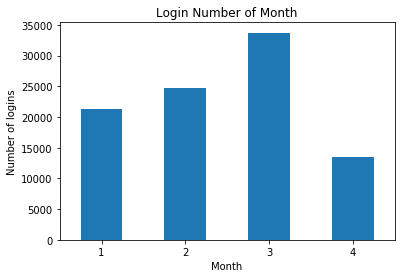

In [12]:
# Group by month and plot them 
cdf.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

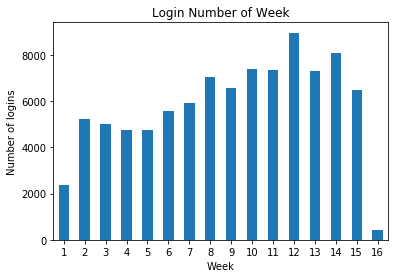

In [13]:
# Group by Week and plot them
cdf.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

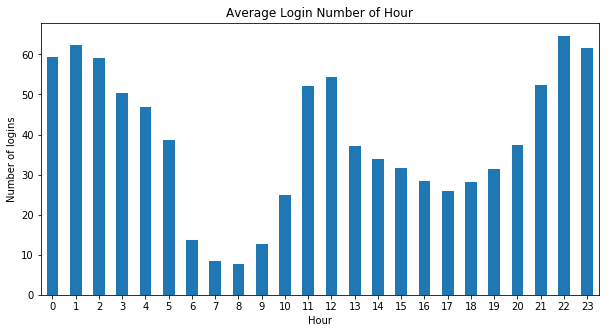

In [14]:
# Group by hour
nday = 30+28+30+13   # total days
(cdf.groupby('hour')['count'].sum()/nday).plot(kind='bar', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Conclusion: Looks like The sum of the login number shows that it is highest in March. and it is steadyley increasing. April month has less days than others. Of all the weeks the 12th week shows highest login number.There is not much logins in the morning  but it is maximum during night.(21,22,23,0,1,2,)

# Part 2 Experimental and metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
     
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
     to implent the dat has to be collected for toll cost reimbursed, date, time, how much , and also from which city to which city. The aggregation of them would help to analyze the trend.
b. what statistical test(s) you will conduct to verify the significance of the
observation
       
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
    To present to the city operations using visulaizing techinques and showing the trend for day, time and what percentage was reimbursed etc can be used.

# Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

Data description

● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYY MM DD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: the average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [15]:
import json
file= open('C:\\Harinee\\Projects\\ultimate_challenge\\ultimate_data_challenge.json', 'r')
df1 = pd.DataFrame(json.load(file))
file.close()
                  
df1
#df1 = pd.read_json ('C:\\Harinee\\Projects\\ultimate_challenge\\ultimate_data_challenge.json')
#df1.data.apply(pd.Series)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
#The avg-rating_by_driver,avg_rating_of_driver, and phone have missing values
# Fill in missing values
df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].mean(), inplace=True)
df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].mean(), inplace=True)
df1.dropna(axis=0, inplace=True)
df1 = df1.reset_index(drop=True)

In [18]:
df1.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

# Exploratory Data Analysis

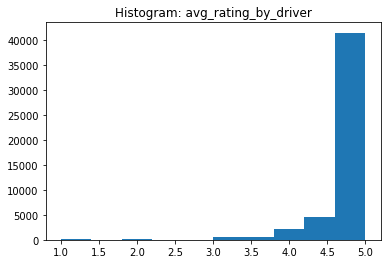

In [19]:
# to check what is the distribution of values for avg_rating_by_driver
plt.hist(df1[np.logical_not(df1['avg_rating_by_driver'].isnull())]['avg_rating_by_driver'])
plt.title('Histogram: avg_rating_by_driver')
plt.show;

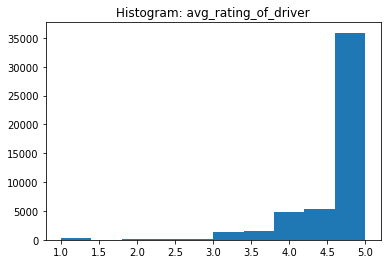

In [20]:
# to check what is the distribution of values for avg_rating_of_driver

plt.hist(df1[np.logical_not(df1['avg_rating_of_driver'].isnull())]['avg_rating_of_driver'])
plt.title('Histogram: avg_rating_of_driver')
plt.show;

In [21]:
# Make lists of each feature type for easy plotting

numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

categorical_features = ['city', 'phone', 'ultimate_black_user']

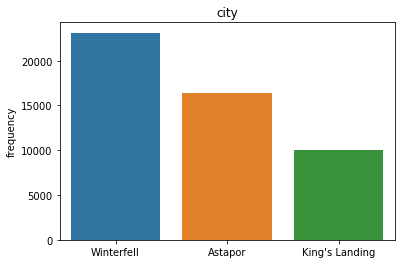

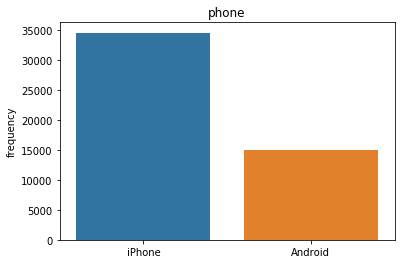

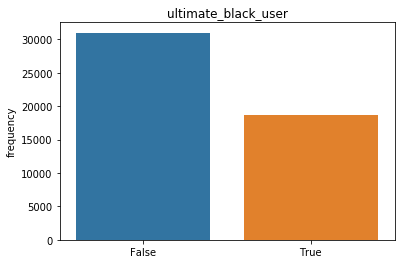

In [22]:
# Create box plots of all categorical, non-date data

for feature in categorical_features:
    sns.barplot(x = list(df1[np.logical_not(df1[feature].isnull())][feature].value_counts().index), 
                y = df1[np.logical_not(df1[feature].isnull())][feature].value_counts())
    plt.title(feature)
    plt.ylabel('frequency')
    plt.show();

In [23]:
# to show the correlation matrix
corr_matrix = df1.corr()
corr_matrix

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.011360,-0.001934,0.005548,0.112221,0.050791,-0.136830,-0.038948
avg_rating_of_driver,-0.011360,1.000000,-0.021638,-0.003188,-0.002543,0.011987,0.028752,0.101086
avg_surge,-0.001934,-0.021638,1.000000,0.793409,-0.077733,-0.110199,-0.081693,0.010710
surge_pct,0.005548,-0.003188,0.793409,1.000000,-0.105645,-0.145152,-0.104532,0.020328
ultimate_black_user,0.112221,-0.002543,-0.077733,-0.105645,1.000000,0.035878,0.032939,0.009276
weekday_pct,0.050791,0.011987,-0.110199,-0.145152,0.035878,1.000000,0.102253,0.020053
avg_dist,-0.136830,0.028752,-0.081693,-0.104532,0.032939,0.102253,1.000000,0.079493
avg_rating_by_driver,-0.038948,0.101086,0.010710,0.020328,0.009276,0.020053,0.079493,1.000000


In [24]:
# To check if there are any features correlated at above 0.50 or below -0.50
corr_matrix[(abs(corr_matrix) >= 0.50) & (abs(corr_matrix) < 1.0)]

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,0.793409,NaN,NaN,NaN,NaN
surge_pct,NaN,NaN,0.793409,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is noticed that surge_pct and avg_surge are highly correlated with each other at 0.793409, and this makes sense given these two features are highly related to there being a surge or not. 

In [ ]:
#to find the fraction of the observed users that were retained


# Data Modeling

Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?

In [25]:
# Create the target variable, retained
df1['retained'] = np.nan
df1.loc[df1['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df1.loc[df1['last_trip_date'] < '2014-06-01', 'retained'] = 0

df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0


In [26]:
# Drop last_trip_date since the target feature is based on that
df1.drop('last_trip_date', axis=1, inplace=True)

In [27]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [28]:
# One-hot-encode all categorical features
df1_encoded = pd.get_dummies(df1, columns = ['city', 'phone', 'ultimate_black_user'])

df1_encoded.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,15.4,46.2,3.67,5.0,1.0,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,0.0,50.0,8.26,5.0,0.0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,0.0,100.0,0.77,5.0,0.0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,20.0,80.0,2.36,4.9,1.0,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,11.8,82.4,3.13,4.9,0.0,0,0,1,1,0,1,0


In [29]:
# Split into train and test sets

train, test = train_test_split(df1_encoded, test_size=.30, 
                               random_state=42, stratify=df1_encoded['retained'])

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print('Train shape: {}\n Test shape: {}'.format(train.shape, test.shape))

Train shape: (34722, 16)
 Test shape: (14882, 16)


In [52]:
file= open('C:\\Harinee\\Projects\\ultimate_challenge\\ultimate_data_challenge.json', 'r')
df1 = pd.DataFrame(json.load(file))
file.close()

df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].mean(), inplace=True)
df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].mean(), inplace=True)
df1.dropna(axis=0, inplace=True)
df1 = df1.reset_index(drop=True)

df1['retained'] = np.nan
df1.loc[df1['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df1.loc[df1['last_trip_date'] < '2014-06-01', 'retained'] = 0

df1.head()
df1.drop('last_trip_date', axis=1, inplace=True)
df1.drop('signup_date', axis=1, inplace=True)

df1_encoded = pd.get_dummies(df1, columns = ['city', 'phone', 'ultimate_black_user'])

df1_encoded.head()
train, test = train_test_split(df1_encoded, test_size=.30, 
                               random_state=42, stratify=df1_encoded['retained'])

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [53]:
# Perform cross validation on the training set

from sklearn.model_selection import KFold

target = train['retained']
train = train.drop('retained', axis=1)

clf = DecisionTreeClassifier(max_depth=4)



In [54]:
#cv = KFold(len(train), n_folds=5)
kf = KFold(n_splits=5)
cv_count = 1
for traincv, testcv in  kf.split(train):  
        preds = clf.fit(train.loc[list(traincv),:], 
                        target.loc[list(traincv),]).predict(train.loc[list(testcv),:])
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(target.loc[testcv,], preds)

        print('Trial {} CV\nAccuracy: {:.2f}\nAUC: {:.4f}\nConfusion Matrix:\n{}\n\n'\
                  .format(cv_count, accuracy_score(target.loc[testcv,], preds)*100, 
                          auc(false_positive_rate, true_positive_rate),
                          confusion_matrix(target.loc[testcv,], preds)))
        cv_count += 1


Trial 1 CV
Accuracy: 75.18
AUC: 0.7402
Confusion Matrix:
[[3382  900]
 [ 824 1839]]


Trial 2 CV
Accuracy: 75.22
AUC: 0.7410
Confusion Matrix:
[[3425  940]
 [ 781 1799]]


Trial 3 CV
Accuracy: 74.67
AUC: 0.7251
Confusion Matrix:
[[3526  826]
 [ 933 1659]]


Trial 4 CV
Accuracy: 74.94
AUC: 0.7368
Confusion Matrix:
[[3410  918]
 [ 822 1794]]


Trial 5 CV
Accuracy: 75.04
AUC: 0.7373
Confusion Matrix:
[[3421  905]
 [ 828 1790]]




In [55]:
# Train the model on the full training data and test on the test set
final_clf = clf.fit(train, target)

test_target = test['retained']
test_preds = final_clf.predict(test.drop('retained', axis=1))

print('Test set accuracy: {:.2f}\nConfusion Matrix:\n{}'\
          .format(accuracy_score(test_target, test_preds)*100, 
                  confusion_matrix(test_target, test_preds)))

Test set accuracy: 74.34
Confusion Matrix:
[[7509 1771]
 [2048 3554]]


In [84]:
feature_importance = pd.DataFrame(final_clf.feature_importances_).T
feature_importance.columns = list(train.columns)
#print(feature_importance.transpose().sort_values())
print(feature_importance.transpose().sort_values(by=0, ascending=False))

                                  0
avg_rating_by_driver       0.536477
city_King's Landing        0.238355
phone_Android              0.086859
weekday_pct                0.042131
phone_iPhone               0.040447
ultimate_black_user_False  0.030529
ultimate_black_user_True   0.014647
surge_pct                  0.008029
trips_in_first_30_days     0.002525
avg_rating_of_driver       0.000000
avg_surge                  0.000000
avg_dist                   0.000000
city_Astapor               0.000000
city_Winterfell            0.000000


We used a DecisionTreeClassifier model and obtained an accuracy of 74.34%. the conusion matrix is as above.  The top predictive features are avg_rating_by_driver, city_King's Landing, phone_Android              